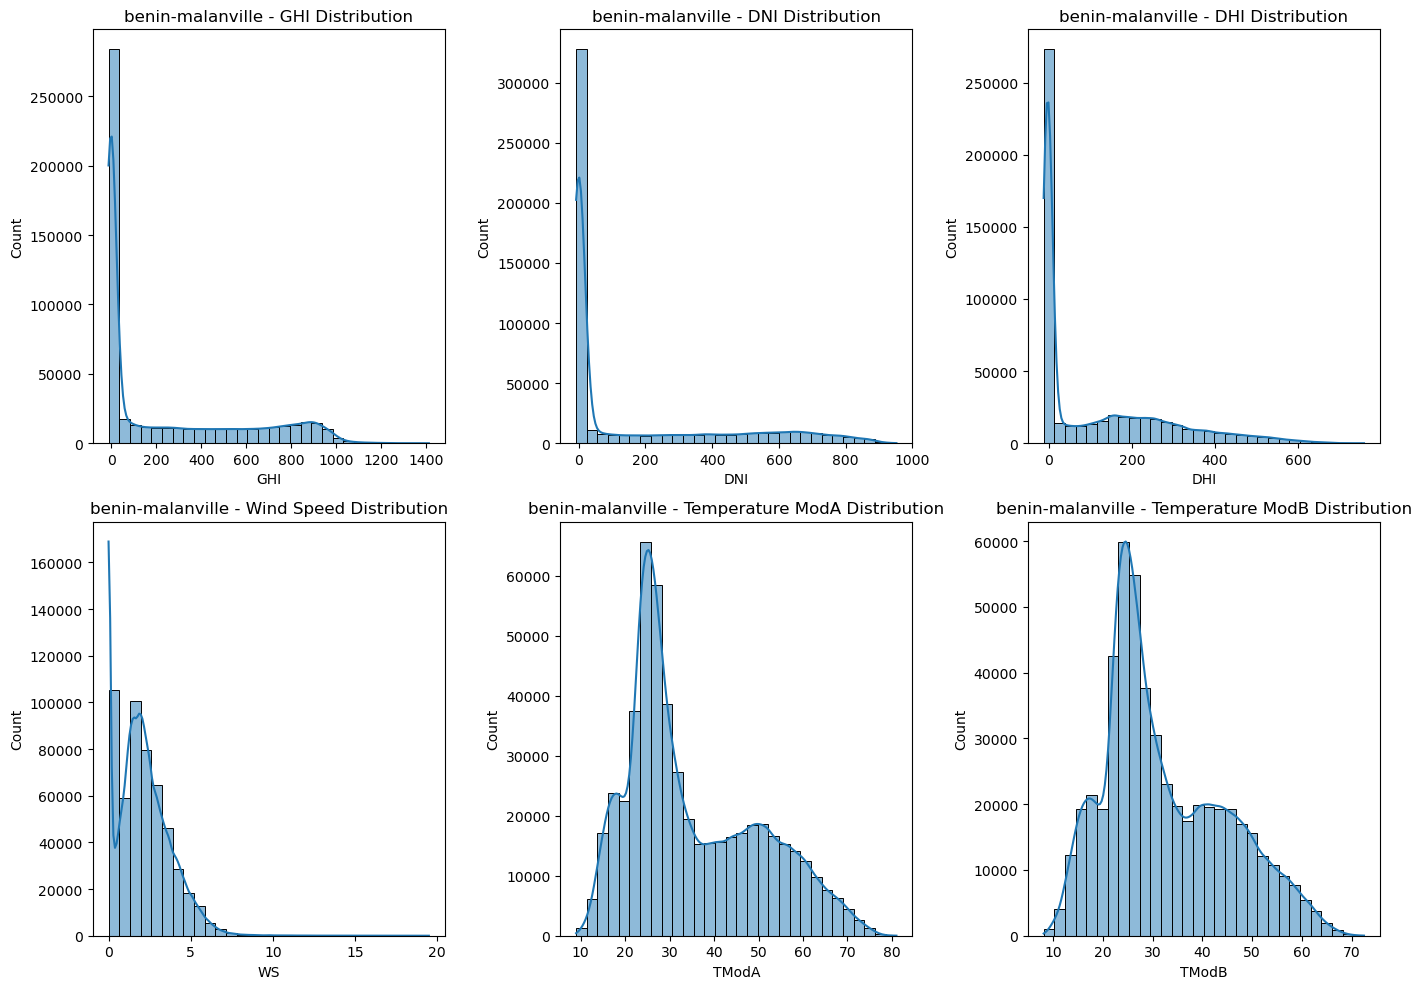

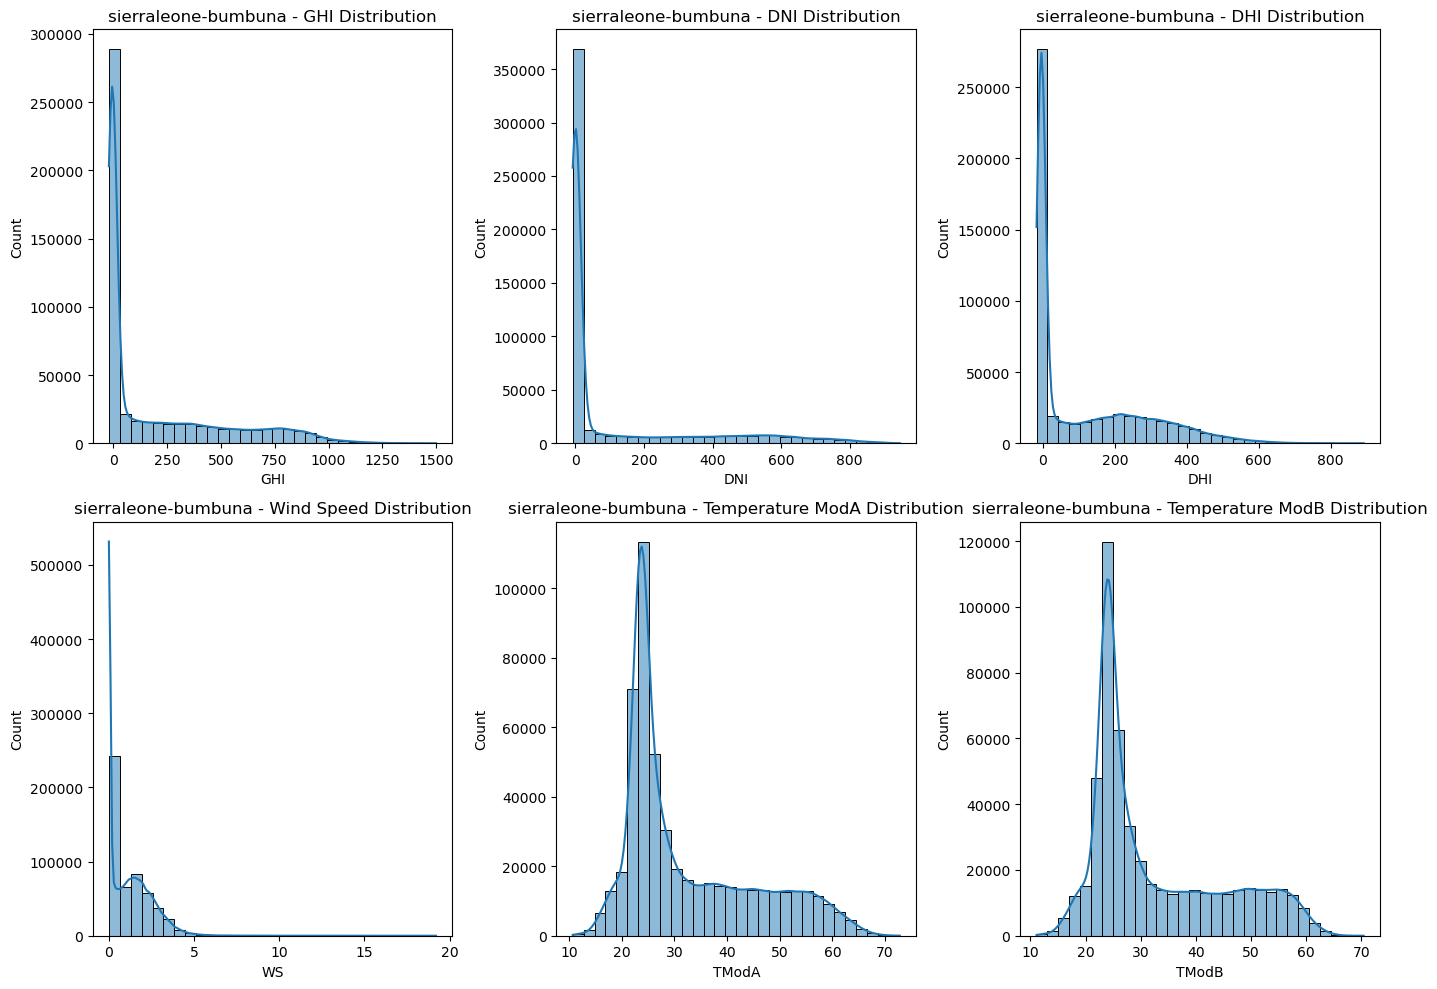

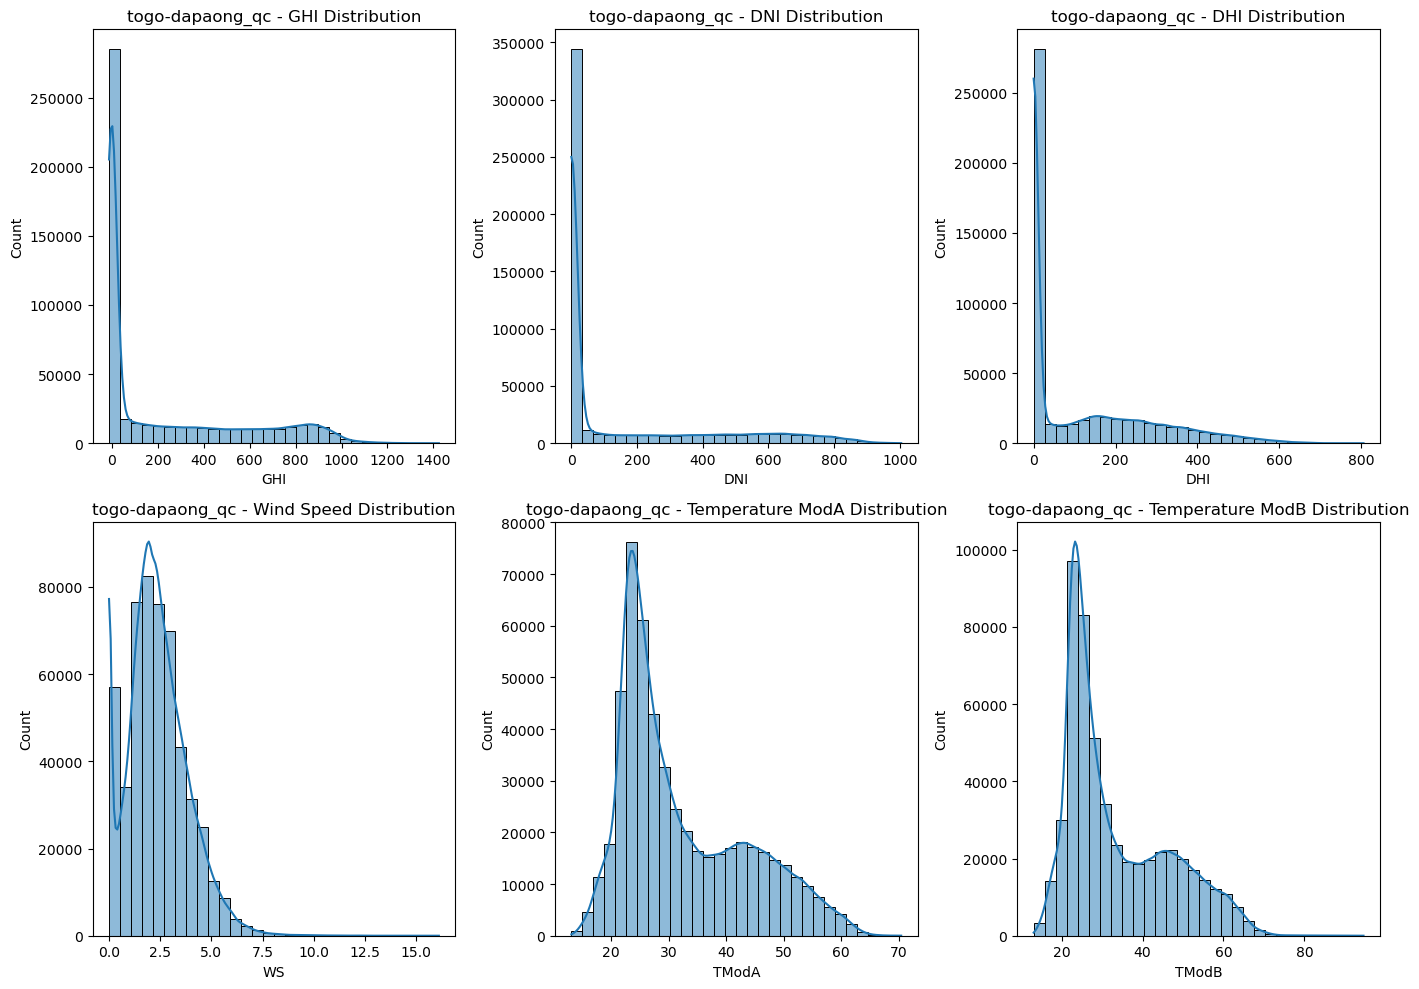

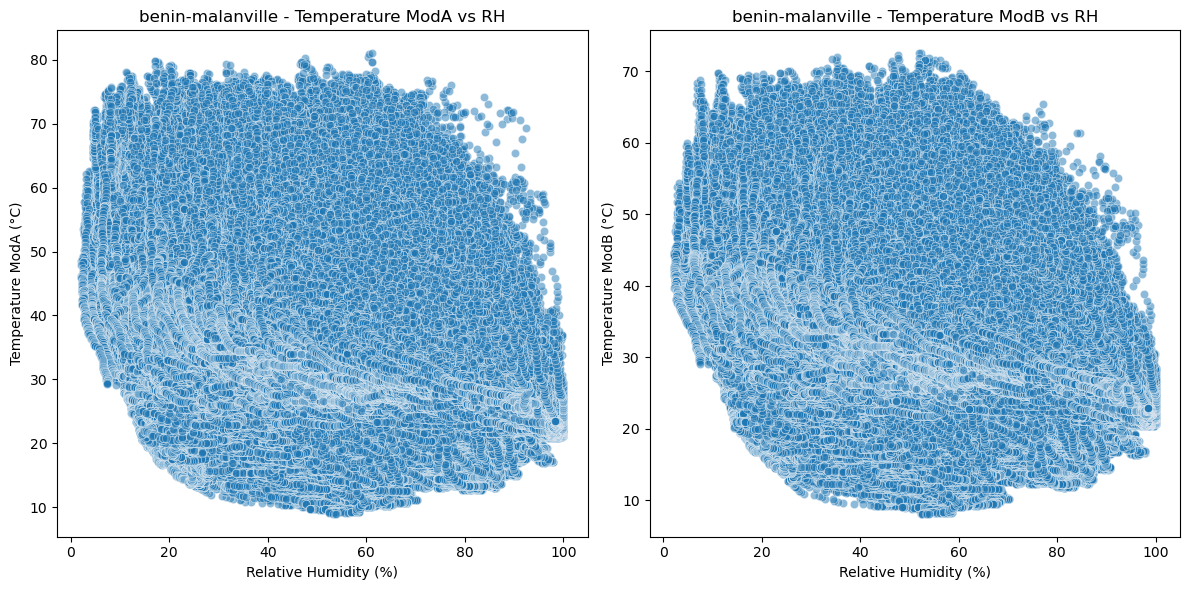

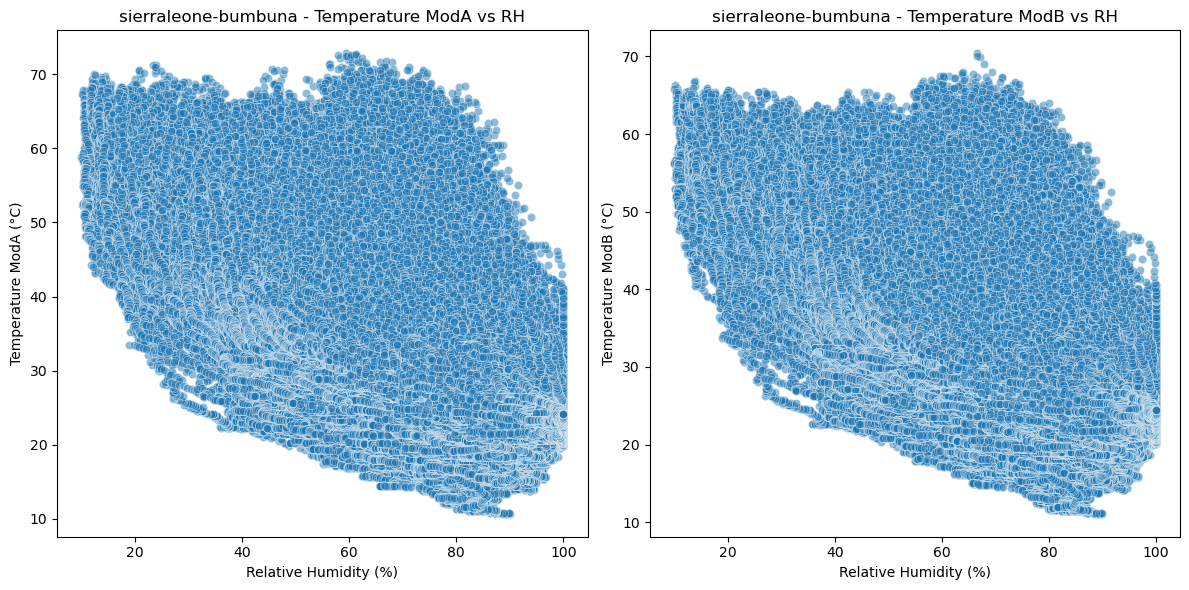

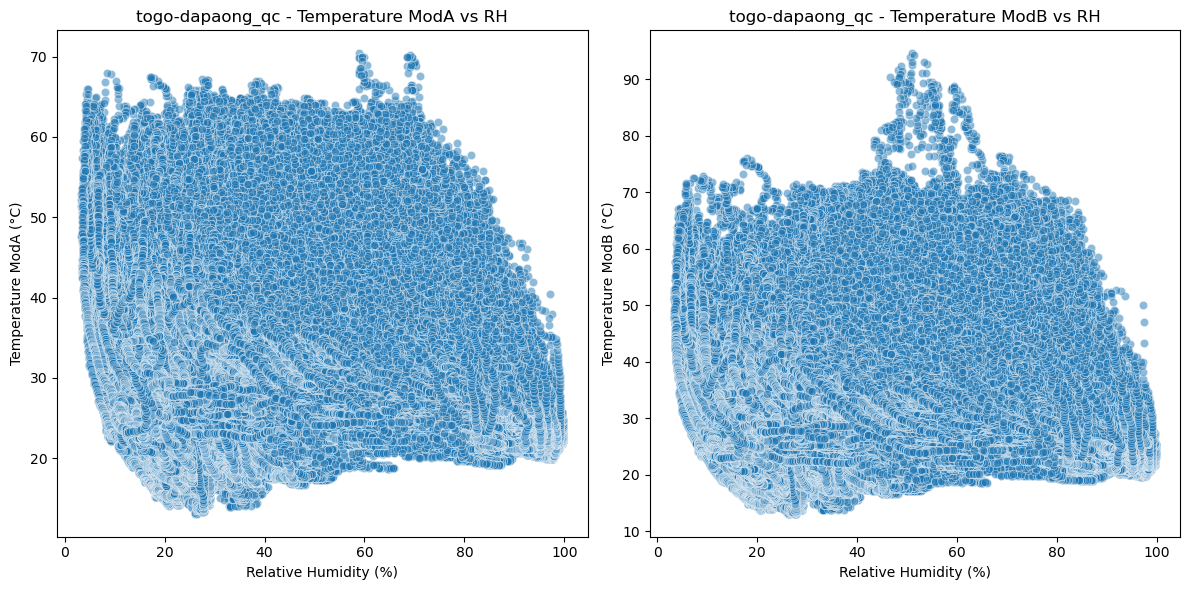

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths for the saved datasets
file_paths = {
    'benin-malanville': 'benin-malanville_data.csv',
    'sierraleone-bumbuna': 'sierraleone-bumbuna_data.csv',
    'togo-dapaong_qc': 'togo-dapaong_qc_data.csv'
}

class TemperatureAndHumidityAnalyzer:
    def __init__(self, file_paths):
        # Load datasets
        self.dataframes = {country: pd.read_csv(path) for country, path in file_paths.items()}

    def plot_histograms(self):
        """
        Plots histograms for GHI, DNI, DHI, WS, and temperature variables.
        """
        for country, df in self.dataframes.items():
            plt.figure(figsize=(14, 10))
            
            # Plot histograms
            plt.subplot(2, 3, 1)
            sns.histplot(df['GHI'].dropna(), bins=30, kde=True)
            plt.title(f'{country} - GHI Distribution')

            plt.subplot(2, 3, 2)
            sns.histplot(df['DNI'].dropna(), bins=30, kde=True)
            plt.title(f'{country} - DNI Distribution')

            plt.subplot(2, 3, 3)
            sns.histplot(df['DHI'].dropna(), bins=30, kde=True)
            plt.title(f'{country} - DHI Distribution')

            plt.subplot(2, 3, 4)
            sns.histplot(df['WS'].dropna(), bins=30, kde=True)
            plt.title(f'{country} - Wind Speed Distribution')

            plt.subplot(2, 3, 5)
            sns.histplot(df['TModA'].dropna(), bins=30, kde=True)
            plt.title(f'{country} - Temperature ModA Distribution')

            plt.subplot(2, 3, 6)
            sns.histplot(df['TModB'].dropna(), bins=30, kde=True)
            plt.title(f'{country} - Temperature ModB Distribution')

            plt.tight_layout()
            plt.show()

    def analyze_temperature_humidity_relationship(self):
        """
        Analyzes the relationship between temperature and relative humidity.
        """
        for country, df in self.dataframes.items():
            # Check if required columns are present
            if 'RH' not in df.columns or 'TModA' not in df.columns or 'TModB' not in df.columns:
                print(f"Missing columns for humidity or temperature analysis in {country}. Skipping.")
                continue

            # Plot temperature vs relative humidity
            plt.figure(figsize=(12, 6))

            plt.subplot(1, 2, 1)
            sns.scatterplot(data=df, x='RH', y='TModA', alpha=0.5)
            plt.title(f'{country} - Temperature ModA vs RH')
            plt.xlabel('Relative Humidity (%)')
            plt.ylabel('Temperature ModA (°C)')

            plt.subplot(1, 2, 2)
            sns.scatterplot(data=df, x='RH', y='TModB', alpha=0.5)
            plt.title(f'{country} - Temperature ModB vs RH')
            plt.xlabel('Relative Humidity (%)')
            plt.ylabel('Temperature ModB (°C)')

            plt.tight_layout()
            plt.show()

# Create an instance of TemperatureAndHumidityAnalyzer
analyzer = TemperatureAndHumidityAnalyzer(file_paths)

# Plot histograms for each dataset
analyzer.plot_histograms()

# Analyze the relationship between temperature and relative humidity
analyzer.analyze_temperature_humidity_relationship()
